### Get data

In [250]:
import json 
import pandas as pd
import glob

In [251]:
# Load all StreamingHistory JSON files into a single DataFrame
files = glob.glob("../PersonalMusic/data/*Streaming_History*.json")
dfs = []

for file in files:
    with open(file, "r", encoding="utf-8") as f:
        data = json.load(f)
        dfs.append(pd.DataFrame(data))

df = pd.concat(dfs, ignore_index=True)

### Clean Data

In [252]:
df = df.rename(
    columns={
        'master_metadata_track_name': 'track_name',
        'master_metadata_album_artist_name': 'artist_name', 
        'master_metadata_album_album_name': 'album_name'
        })

df['minutes_played'] = df['ms_played']/60000

df['yearlyquarter'] = pd.PeriodIndex(df.ts, freq='Q').astype(str)
# Split the 'yearlyquarter' column into 'year' and 'quarter'
df['year'] = df['yearlyquarter'].str[:4]  # Extract the first 4 characters for the year
df['quarter'] = df['yearlyquarter'].str[-1]  # Extract the last character for the quarter


df['album_with_artist'] = df['album_name'] + ' | ' + df['artist_name']

In [253]:
df.columns

Index(['ts', 'platform', 'ms_played', 'conn_country', 'ip_addr', 'track_name',
       'artist_name', 'album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'audiobook_title',
       'audiobook_uri', 'audiobook_chapter_uri', 'audiobook_chapter_title',
       'reason_start', 'reason_end', 'shuffle', 'skipped', 'offline',
       'offline_timestamp', 'incognito_mode', 'minutes_played',
       'yearlyquarter', 'year', 'quarter', 'album_with_artist'],
      dtype='object')

In [254]:
# df.to_csv('../PersonalMusic/data/compiled_data.csv', index=False)

In [255]:
df.head()

,ts,platform,ms_played,conn_country,ip_addr,track_name,artist_name,album_name,spotify_track_uri,episode_name,...,shuffle,skipped,offline,offline_timestamp,incognito_mode,minutes_played,yearlyquarter,year,quarter,album_with_artist
0,2017-09-30T11:46:08Z,"iOS 10.3.3 (iPhone6,2)",295893,GB,149.254.234.91,What It Is,Mark Knopfler,Sailing To Philadelphia,spotify:track:65f8Ca4HbZCMLhpZPTHW4O,None,...,True,False,False,NaN,False,4.931550,2017Q3,2017,3,Sailing To Philadelphia | Mark Knopfler
1,2017-09-30T11:49:29Z,"iOS 10.3.3 (iPhone6,2)",201320,GB,149.254.234.91,Instant Karma! (We All Shine On) - Remastered ...,John Lennon,Power To The People - The Hits,spotify:track:2ZbFPXkcaYPq3tu1mLJkjk,None,...,True,False,False,NaN,False,3.355333,2017Q3,2017,3,Power To The People - The Hits | John Lennon
2,2017-09-30T11:53:15Z,"iOS 10.3.3 (iPhone6,2)",225080,GB,149.254.234.91,Superman,Lazlo Bane,All The Time In The World,spotify:track:19nAFg6Mb6jXN3yxPC2sSk,None,...,True,False,False,NaN,False,3.751333,2017Q3,2017,3,All The Time In The World | Lazlo Bane
3,2017-09-30T11:57:02Z,"iOS 10.3.3 (iPhone6,2)",227626,GB,149.254.234.91,Heat Of The Moment,Asia,Asia,spotify:track:7KA66zSwthBv5X9bNQEeX1,None,...,True,False,False,NaN,False,3.793767,2017Q3,2017,3,Asia | Asia
4,2017-09-30T22:39:41Z,"iOS 10.3.3 (iPhone6,2)",7740,GB,149.254.234.131,Hey Joe,Jimi Hendrix,Are You Experienced,spotify:track:0NWPxcsf5vdjdiFUI8NgkP,None,...,True,False,False,NaN,False,0.129000,2017Q3,2017,3,Are You Experienced | Jimi Hendrix


### Explore Data

#### Music

In [256]:
#artist dataframe
artist_playtime = df.groupby('artist_name')['minutes_played'].sum().reset_index()
artist_playtime = artist_playtime.sort_values(by='minutes_played', ascending=False)
top_artists = artist_playtime.head(10)

#album dataframe
album_playtime = df.groupby('album_with_artist')['minutes_played'].sum().reset_index()
album_playtime = album_playtime.sort_values(by='minutes_played', ascending=False)


#quarterly analysis for artists
artist_quarterly_playtime = df.groupby(['artist_name','quarter'])['minutes_played'].sum().reset_index()
artist_quarterly_playtime = artist_quarterly_playtime.sort_values(by='minutes_played', ascending=False)

# Filter the DataFrame to include only top artists
artist_quarterly_playtime_filtered = artist_quarterly_playtime[artist_quarterly_playtime['artist_name'].isin(top_artists['artist_name'])]

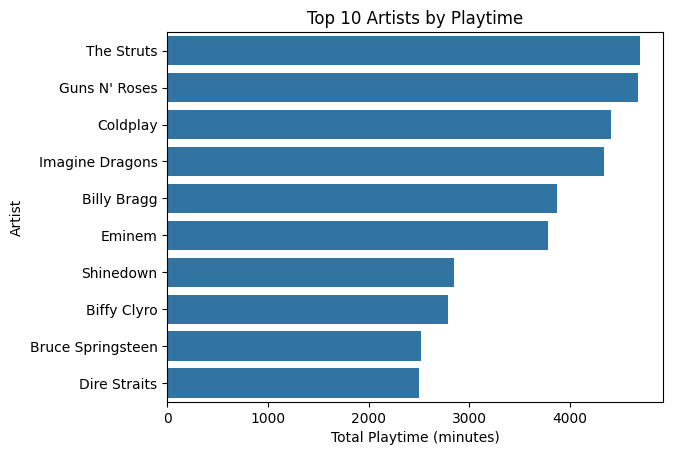

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 10 artists by playtime
sns.barplot(x='minutes_played', y='artist_name', data=top_artists)
plt.title("Top 10 Artists by Playtime")
plt.xlabel("Total Playtime (minutes)")
plt.ylabel("Artist")
plt.show()

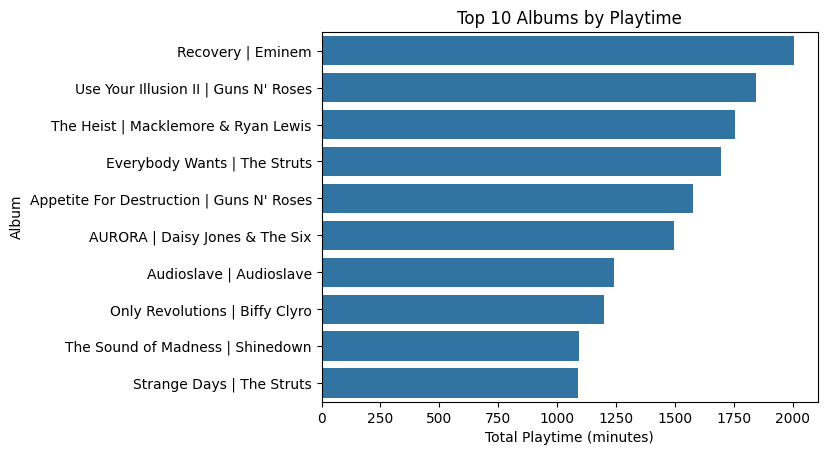

In [259]:
# Plot top 10 albums by playtime
top_albumns = album_playtime.head(10)
sns.barplot(x='minutes_played', y='album_with_artist', data=top_albumns)
plt.title("Top 10 Albums by Playtime")
plt.xlabel("Total Playtime (minutes)")
plt.ylabel("Album")
plt.show()

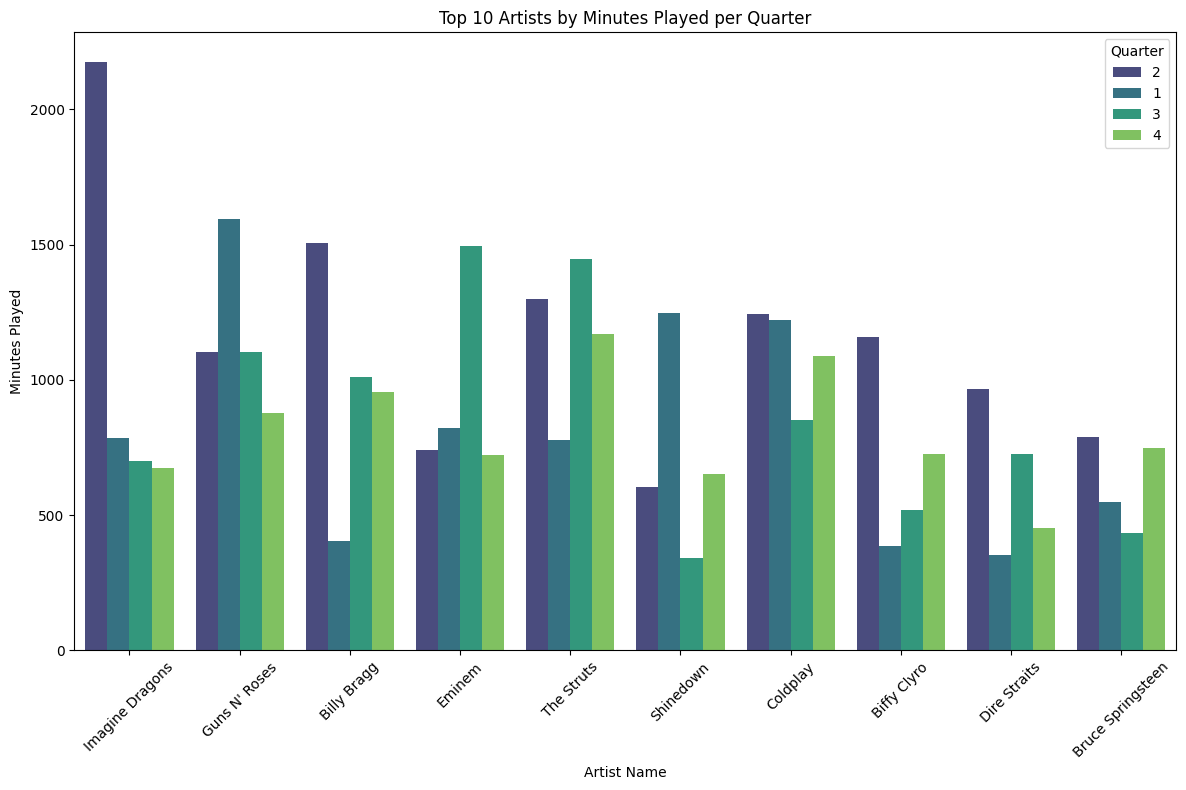

In [261]:
# Create a grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='artist_name', y='minutes_played', hue='quarter', data=artist_quarterly_playtime_filtered, palette='viridis')

# Add labels and title
plt.title('Top 10 Artists by Minutes Played per Quarter')
plt.xlabel('Artist Name')
plt.ylabel('Minutes Played')
plt.legend(title='Quarter')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()